# Numerical Example

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


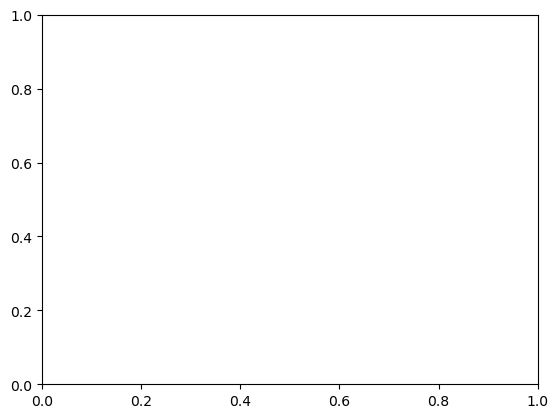

In [1]:
import koma.oma, koma.plot
import numpy as np
import matplotlib.pyplot as plt
import koma.clustering
import geneate_vibration_data

from scipy.signal import detrend, welch, resample

from knutils.modal import statespace as to_A
from knutils.structural import shearframe
from beef.newmark import newmark_lin
import plot_koma

In [2]:
path = "vibration_data/data_stochastic_3_floor_"

number_of_realizations = 100

### Data generation

In [3]:
for i in range(number_of_realizations):
    geneate_vibration_data.generate_data(9, path + str(i) + ".npz")

KeyboardInterrupt: 

### Define SSI parameters

In [3]:
i = 100
s = 3

orders = np.arange(2, 50+2, 2)
print(orders)
stabcrit = {'freq':0.2, 'damping': 0.2, 'mac': 0.3}

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50]


### Cov-SSI call and pole clustering

In [8]:
freq_modes = []

for j in range(number_of_realizations):

    data = np.load(path + str(j) + ".npz")
    y = data["y"].transpose()
    print(y.shape)
    fs = data["fs"].transpose()
    true_f = data["true_frequencies"].transpose()
    true_xi = data["true_damping"].transpose()
    true_modeshapes = data["true_modeshapes"].transpose()

    #Cov-SSI call
    lambd, phi = koma.oma.covssi(y, fs, i, orders, showinfo=False) # find poles by Cov-SSI
    lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, stabcrit=stabcrit, indicator='mac') # Stable poles

    #Pole clustering
    pole_clusterer = koma.clustering.PoleClusterer(lambd_stab, phi_stab, orders_stab, min_cluster_size=10, min_samples=10, scaling={'mac':1.0, 'lambda_real':1.0, 'lambda_imag': 1.0})
    prob_threshold = 0.5   #probability of pole to belong to cluster, based on estimated "probability" density function
    args = pole_clusterer.postprocess(prob_threshold=prob_threshold, normalize_and_maxreal=True)

    xi_auto, omega_n_auto, phi_auto, order_auto, probs_auto, ixs_auto = koma.clustering.group_clusters(*args)

    #plot_koma.plot_stab_from_KOMA(np.array(omega_n_auto)/2/np.pi, order_auto).savefig("results/realization_" + str(j) + ".jpg")

    xi_mean = np.array([np.mean(xi_i) for xi_i in xi_auto])
    fn_mean = np.array([np.mean(om_i) for om_i in omega_n_auto])/2/np.pi

    xi_std = np.array([np.std(xi_i) for xi_i in xi_auto])
    fn_std = np.array([np.std(om_i) for om_i in omega_n_auto])/2/np.pi

    freq_modes.append([freq for freq in fn_mean])


#freq_modes = np.array(freq_modes)

(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)


/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling


(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)


/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling


(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)


/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling


(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)


/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling


(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)
(59723, 9)


In [5]:
import itertools
freq_modes_sorted = list(map(list, itertools.zip_longest(*freq_modes, fillvalue=None)))

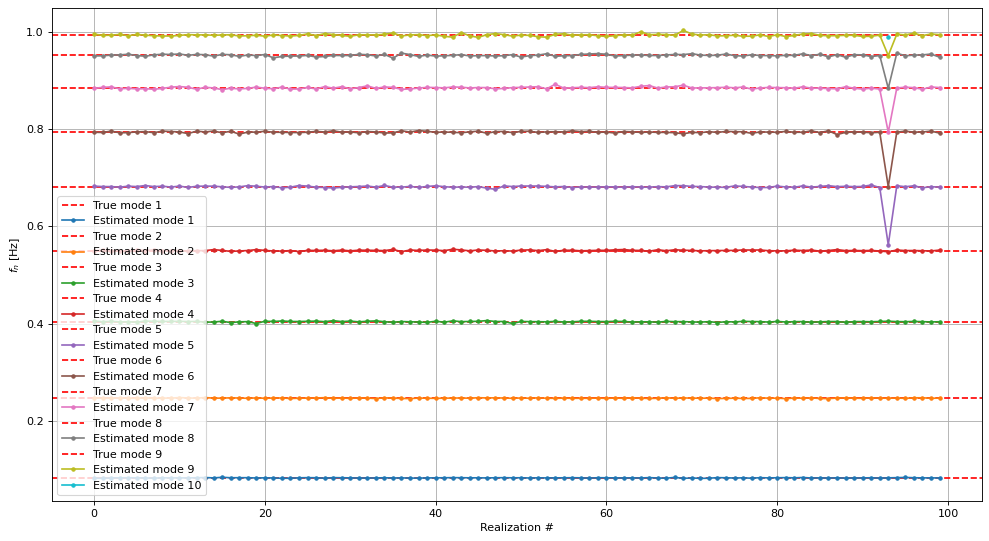

In [7]:
#Plot

plt.figure(figsize=(15, 8), dpi=80)

for i in range(len(freq_modes_sorted)):
    if (i<len(true_f)):
        plt.axhline(y = true_f[i], color = 'r', linestyle = '--', label="True mode " + str(i+1))
    plt.plot(np.arange(0, number_of_realizations), freq_modes_sorted[i], linestyle="-", marker=".", label="Estimated mode " + str(i+1))

plt.grid()
plt.legend()
plt.xlabel("Realization #")
plt.ylabel("$f_n$ [Hz]")
#plt.savefig("plots/num_example_bad.jpg")
plt.show()

In [10]:
print(true_f)

[0.08312307 0.24710182 0.40434028 0.5505494  0.68174096 0.7943364
 0.88526442 0.95204473 0.99285575]


In [7]:
print(np.meshgrid([1,2,3], [1,2,3]))

[array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]]), array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])]


In [23]:
for i in range(len(freq_modes_sorted)):
    print(np.std(freq_modes_sorted[i]))

0.00039252098911760064
0.0005032507520320995
0.0009568051021089452
0.0011471376921011254
0.011948537894047612
0.011293532471533054
0.009295011947672276
0.007078942203251309
0.0046821718213520885


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'